In [2]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from google.colab import drive
import matplotlib.pyplot as plt


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
#from matploitlib.pyplot  as plt

In [7]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Top-fruits-dataset-split.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

print('Train Set:')
train_data = train_datagen.flow_from_directory('/content/Top-fruits-dataset-split/Train',
                                             target_size=(256,256),
                                             batch_size = 16,
                                             class_mode='sparse',
                                             shuffle=True)
print("")

print('Test Set:')
test_data = test_datagen.flow_from_directory('/content/Top-fruits-dataset-split/Test',
                                           target_size=(256,256),
                                           batch_size = 16,
                                           class_mode='sparse',
                                           shuffle=False)


Train Set:
Found 9600 images belonging to 12 classes.

Test Set:
Found 2400 images belonging to 12 classes.


In [9]:
from tensorflow.keras.utils import to_categorical 

#geting catagorical vector for test data
total_classes=len(train_data.class_indices)
train_labels=train_data.classes
train_labels=to_categorical(train_labels,total_classes)

#geting catagorical vector for test data
test_labels=train_data.classes
test_labels=to_categorical(test_labels,total_classes)


In [10]:
from tensorflow.keras.models import Sequential
from keras import regularizers

import tensorflow
num_classes = 12

model = Sequential([ 
  layers.Conv2D(32, 4, padding='same',strides=(1, 1), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, 4, padding='same', strides=(1, 1),activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, 4, padding='same', strides=(1, 1),activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.35),
  layers.Dense(num_classes, activation='softmax')
])
sgd=tensorflow.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.5, nesterov=False, name="SGD")

model.compile(optimizer=sgd,
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
epochs=20
history = model.fit_generator(
  train_data,
  validation_data=test_data,
  epochs=epochs,
  steps_per_epoch=500
)



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


500/500 [==============================] - 161s 315ms/step - loss: 1.7703 - accuracy: 0.3767 - val_loss: 0.9112 - val_accuracy: 0.7013
Epoch 2/20
500/500 [==============================] - 156s 312ms/step - loss: 0.9954 - accuracy: 0.6526 - val_loss: 0.5895 - val_accuracy: 0.8129
Epoch 3/20
500/500 [==============================] - 158s 315ms/step - loss: 0.6681 - accuracy: 0.7734 - val_loss: 0.3950 - val_accuracy: 0.8696
Epoch 4/20
500/500 [==============================] - 158s 315ms/step - loss: 0.5420 - accuracy: 0.8150 - val_loss: 0.4836 - val_accuracy: 0.8471
Epoch 5/20
500/500 [==============================] - 157s 313ms/step - loss: 0.4089 - accuracy: 0.8644 - val_loss: 0.2338 - val_accuracy: 0.9175
Epoch 6/20
500/500 [==============================] - 157s 315ms/step - loss: 0.5530 - accuracy: 0.8278 - val_loss: 0.2206 - val_accuracy: 0.9329
Epoch 7/20
500/500 [==============================] - 158s 315ms/step - loss: 0.3125 - accuracy: 0.8996 - val_loss: 0.1846 - val_accura

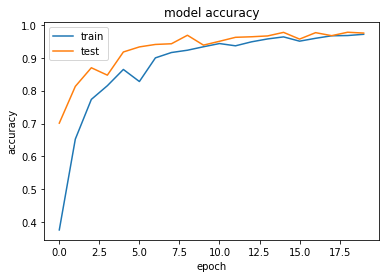

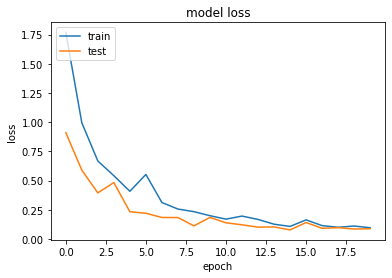

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


<Figure size 432x288 with 0 Axes>

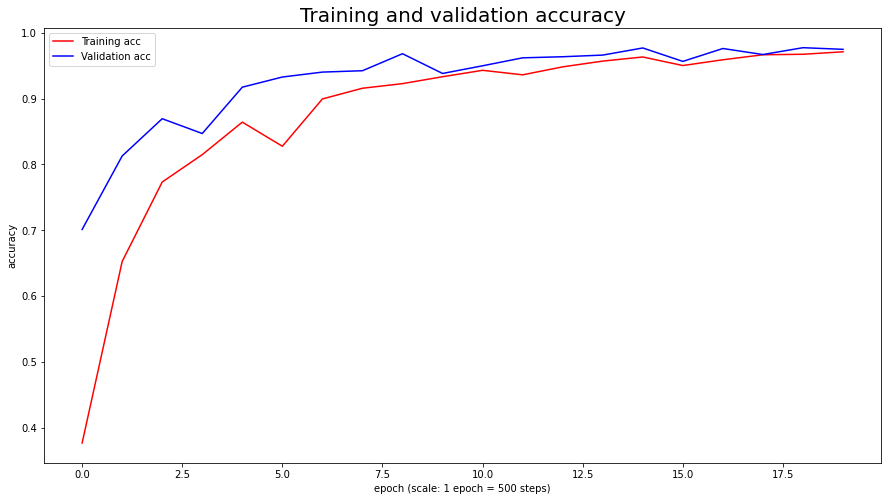

<Figure size 432x288 with 0 Axes>

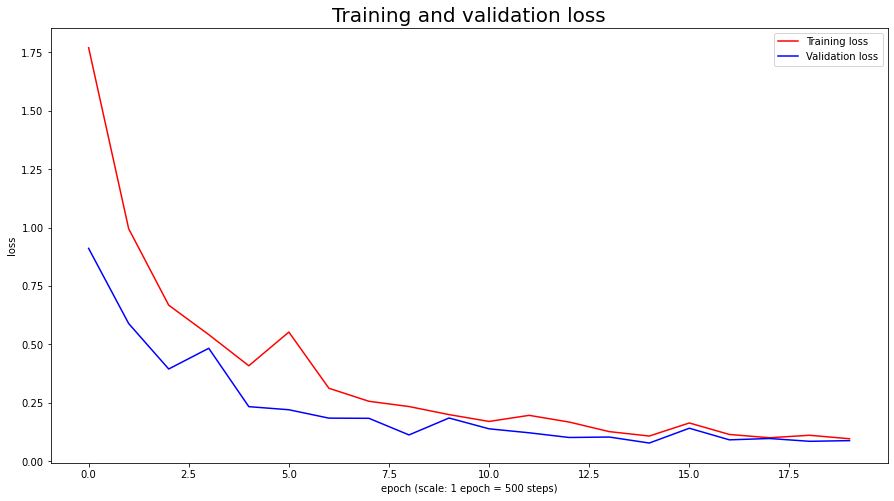

<Figure size 432x288 with 0 Axes>

In [34]:

#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 8))

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', fontsize=20)
plt.ylabel('accuracy') 
plt.xlabel('epoch (scale: 1 epoch = 500 steps)')
plt.legend()
plt.figure()


plt.figure(figsize=(15, 8))

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', fontsize=20)
plt.ylabel('loss') 
plt.xlabel('epoch (scale: 1 epoch = 500 steps)')
plt.legend()
plt.figure()

In [35]:
import pandas as pd
classes = test_data.classes
test_data.reset
prediction = model.predict(test_data)

#print(prediction[0])
#print(len(prediction))
labels = ['0','1','2','3','4','5','6','7','8','9','10','11']
test_scores = np.exp(prediction)/np.sum(np.exp(prediction))  

#print(len(test_scores))
predict_labels = []

for i in range(0,len(test_scores)):
    x = np.argmax(test_scores[i])
    predict_labels.append(labels[x])

#print(predict_labels[0])    
#print(len(labels))    

df = pd.DataFrame({
   'filename': test_data.filenames,
   'original': classes,
   'predict' : predict_labels,
})

In [36]:
df.predict = df.predict.astype(int)
df.original = df.original.astype(int)

<Figure size 432x288 with 0 Axes>

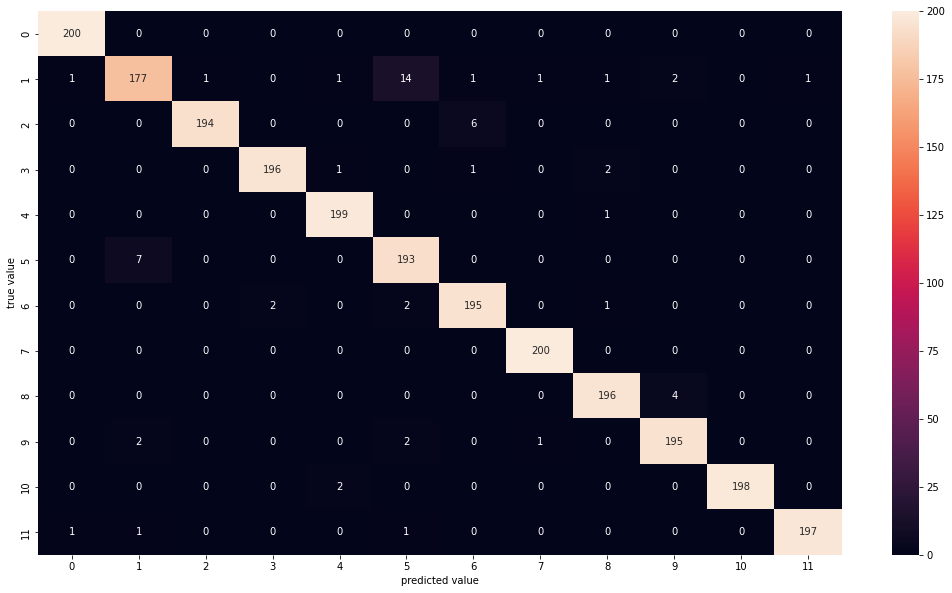

<Figure size 432x288 with 0 Axes>

In [37]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

conf_matrix = confusion_matrix(df.original,df.predict)
sns.heatmap(conf_matrix,annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.figure()

In [38]:
misclassified = df[df['original']!=df['predict']]
print('Total misclassified image from 2400 Validation images : %d'%misclassified['original'].count())

Total misclassified image from 2400 Validation images : 60


In [45]:
x1 = model.evaluate(train_data)
x2 = model.evaluate(test_data)


print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

150/150 [==============================] - 8s 53ms/step - loss: 0.0884 - accuracy: 0.9750
Training Accuracy  : 99.23%     Training loss  : 0.025529
Validation Accuracy: 97.50%     Validation loss: 0.088355


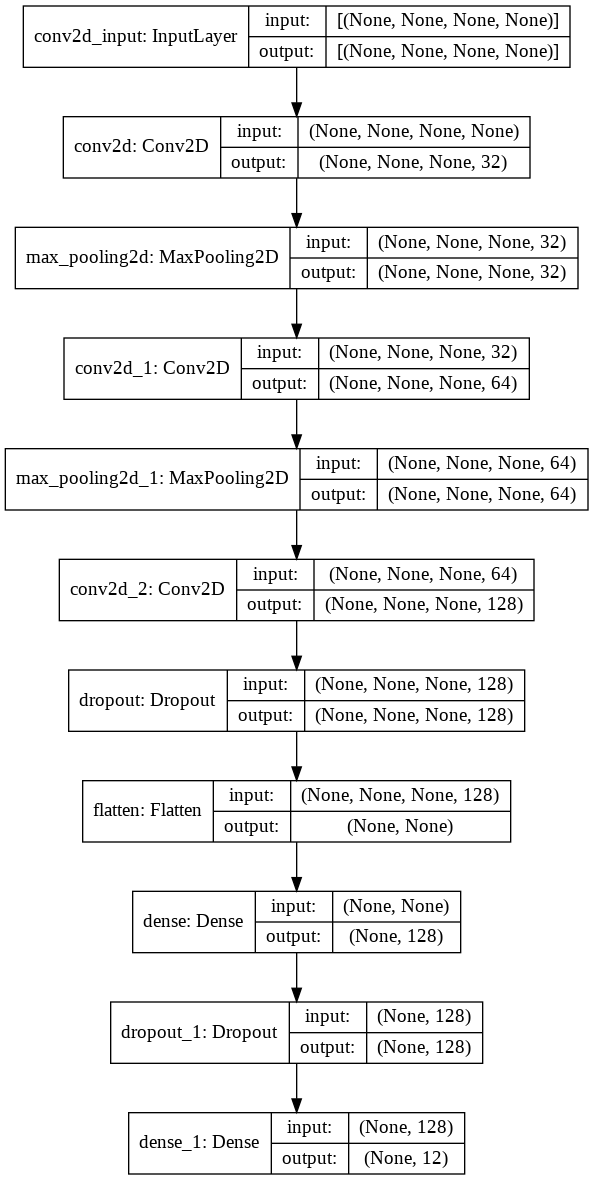

In [43]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

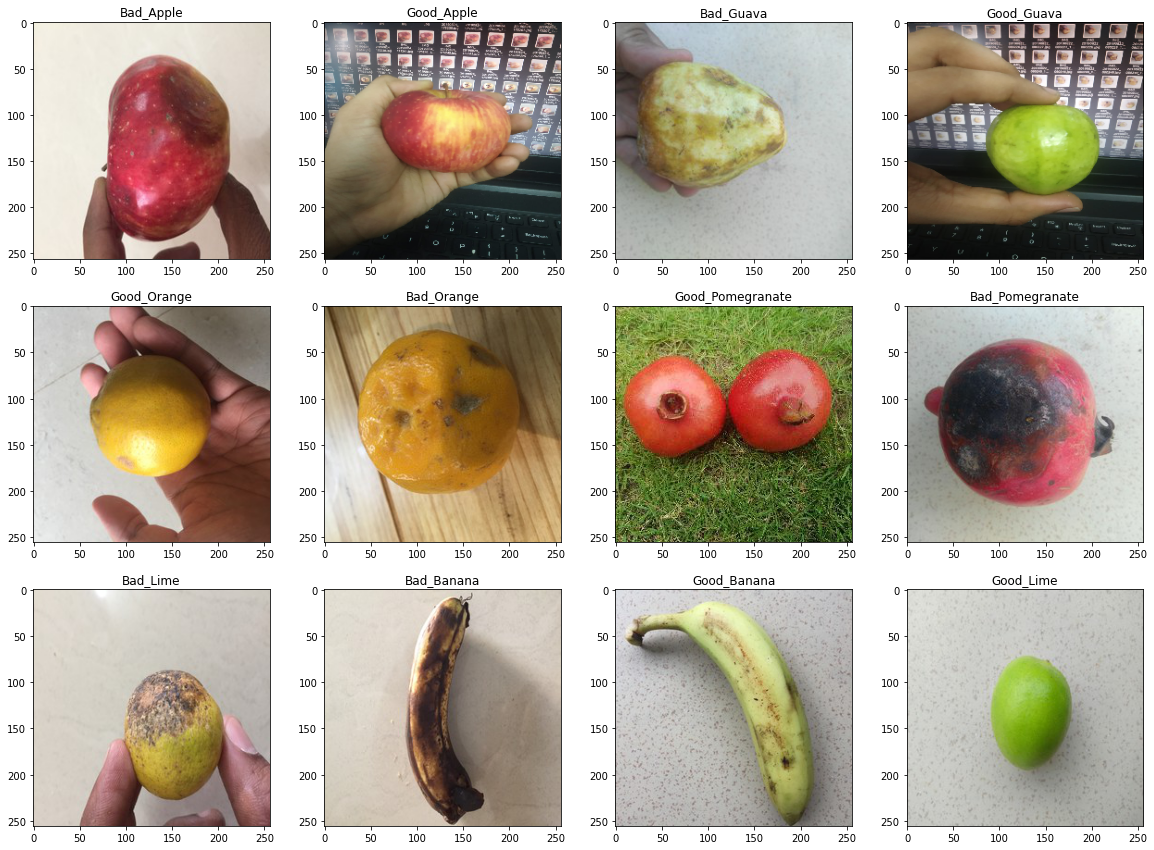

In [72]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

def VisualizeResults(index):
      class_names = ['Bad_Apple','Good_Apple','Bad_Banana','Good_Banana','Bad_Guava','Good_Guava',
               'Bad_Lime','Good_Lime','Bad_Orange','Good_Orange','Bad_Pomegranate','Good_Pomegranate']

      labels = ['0','1','2','3','4','5','6','7','8','9','10','11']
      path="/content/drive/MyDrive/visualize/"+str(index+1)+".jpg"
      img1 = image.load_img(path, target_size=(256, 256))
      img = image.img_to_array(img1)
      img = img/255
      # create a batch of size 1 [N,H,W,C]
      img = np.expand_dims(img, axis=0)
      predictions = model.predict(img)
      scores = np.exp(predictions[0])/np.sum(np.exp(predictions[0]))  
      predict_label = labels[np.argmax(scores)]
      label = class_names[int(predict_label)]
      return img1,label

plt.figure(figsize=(20, 20))
for i in range(0,12):
  img,label=VisualizeResults(i)
  plt.subplot(4,4, i+1)
  plt.title(label)
  plt.imshow(img)
  


